1. Write a approx 750-800 (3PAGE) word description of: 
    - EDA application (e.g., use-case, domain of operation).
    - Describe 3 interesting results from the EDA.
    - How you connected your work to lecture material 
    - Advanced techniques that you used
    - References for API or websites

If you are submitting a PDF, please mention that here. 

-----------------------------------------------------
##### PASTE YOUR TEXT HERE
Submitted as PDF - EDA PokeData Report
-----------------------------------------------------

------------
2. CODE
-----------

Data saved to pokemon.csv


Text(0.5, 1.0, 'Average Base Stat by Generation')

<Figure size 640x480 with 0 Axes>

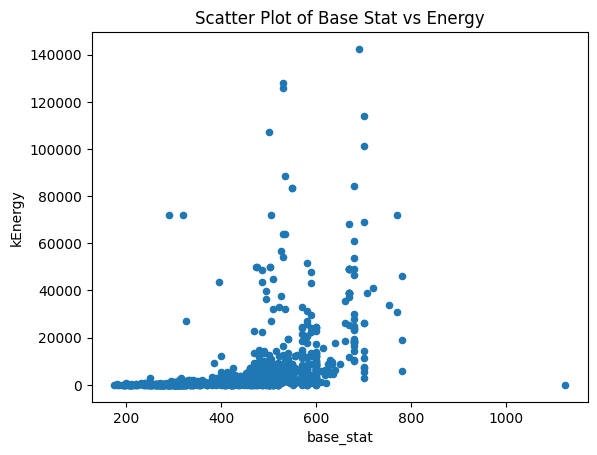

<Figure size 640x480 with 0 Axes>

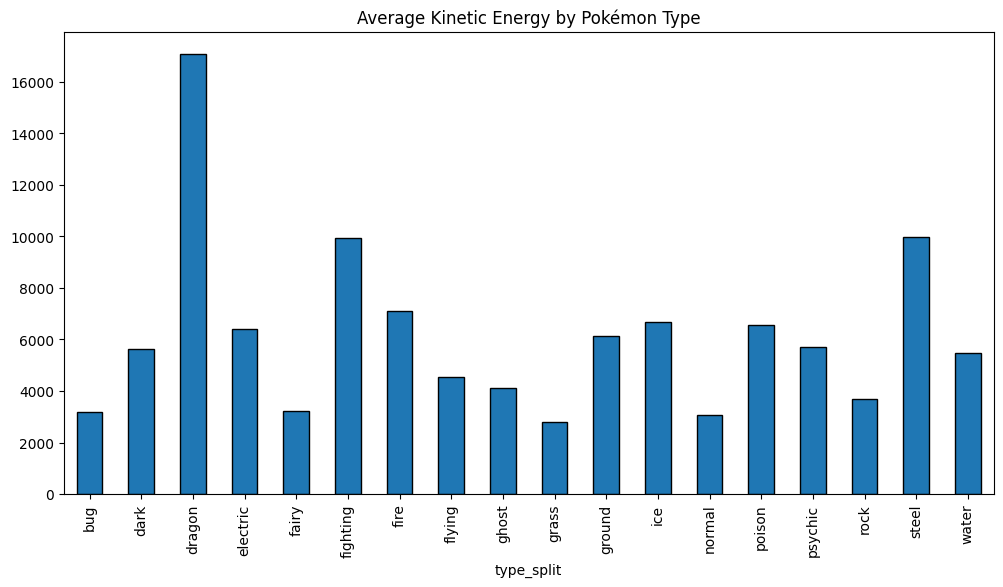

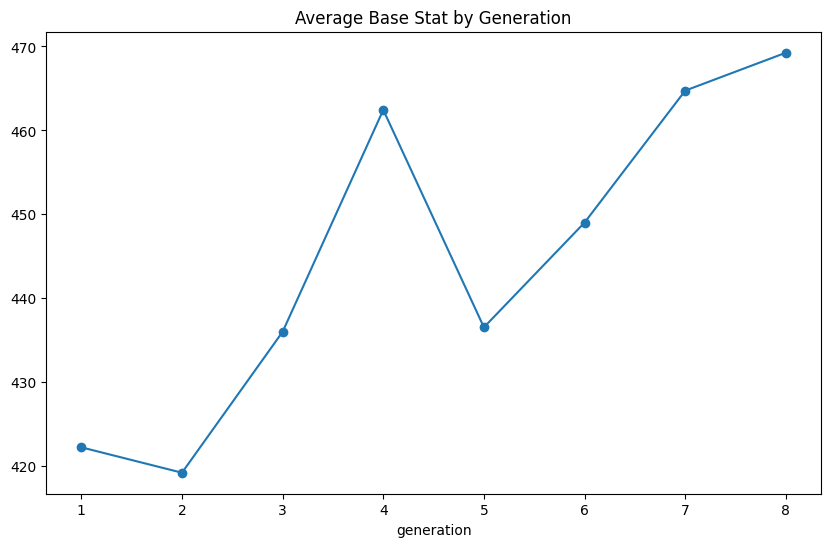

In [145]:
    # PASTE THE CODE HERE
    # Make this easy for user testing - Running this cell should load all code for EDA.
    
    import requests
    import pandas as pd
    import matplotlib.pyplot as plt
    
    # GitHub API URL for searching repositories
    url = "https://pokeapi.co/api/v2/pokemon"
    
    # Define search parameters
    params = {
         "limit": 1500
    }
     #extract fields from other fields
    def extract_field(data_list, field_name):
        return [item[field_name]["name"] for item in data_list]
    
    #extract stat names from stats
    def extract_stat(stats_field, stat_name):
        for item in stats_field:
            if item["stat"]["name"] == stat_name:
                return item["base_stat"]
        return None
    
    #calculate BMI using pokemon weight and hight
    def calculate_bmi(weight, height):
        weight_kg = weight / 10  # Convert weight to kilograms
        height_m = height / 10   # Convert height to meters
        return weight_kg / (height_m ** 2) if height_m > 0 else None
    
    #calculate overall base stats of pokemon
    def calculate_baseStat(hp, attack, defense, spAttack, spDefense, speed):
        return hp + attack + defense + spAttack + spDefense + speed
    
    #convert speed to meters per second
    def calculate_ms(speed):
        return speed * 0.13321792
    
    #calculate kinetic energy of a pokemon
    def calculate_kEnergy(speed, weight):
        return 0.5 * (weight / 10) * (speed ** 2)
    
    #make the request 
    response = requests.get(url, params=params)
    
    if response.status_code == 200:
        #parse the JSON data from the response
        data = response.json()
        
        final_pokemon_data = []
        for pokemon in data["results"]:
            pokemon_response = requests.get(pokemon["url"])
            pokemon_data = pokemon_response.json()  
    
            # fetch species details (to get access to pokemon generation ect)
            species_response = requests.get(pokemon_data["species"]["url"])
            if species_response.status_code == 200:
                species_data = species_response.json()
                generation = species_data["generation"]["name"] 
                shape = species_data["shape"]["name"] 
                colour = species_data["color"]["name"] 
            else:
                generation = []
                shape = []
                colour = []
    
            #filter, clean and collect all useful information
            project_info = {
                "id": pokemon_data["id"],
                "name": pokemon_data["name"],
                "type": ", ".join(extract_type(pokemon_data["types"])),
                "abilities": ", ".join(extract_field(pokemon_data["abilities"],"ability")),
                "moves": ", ".join(extract_field(pokemon_data["moves"],"move")),
                "health": extract_stat(pokemon_data["stats"], "hp"),
                "attack": extract_stat(pokemon_data["stats"], "attack"),
                "defense": extract_stat(pokemon_data["stats"], "defense"),
                "special-attack": extract_stat(pokemon_data["stats"], "special-attack"),
                "special-defense": extract_stat(pokemon_data["stats"], "special-defense"),
                "speed": extract_stat(pokemon_data["stats"], "speed"),
                "height": pokemon_data["height"],
                "weight": pokemon_data["weight"],
                "generation": generation, 
                "shape": shape,
                "colour": colour
            }
            #add my own derived columns
            project_info["bmi"] = calculate_bmi(project_info["weight"], project_info["height"])
            project_info["base_stat"] = calculate_baseStat(project_info["health"], project_info["attack"], project_info["defense"], project_info["special-attack"], project_info["special-defense"], project_info["speed"])
            project_info["m/s"] = calculate_ms(project_info["speed"])
            project_info["kEnergy"] = calculate_kEnergy(project_info["m/s"], project_info["weight"])
            
            final_pokemon_data.append(project_info)
    
        # Convert to DataFrame
        df = pd.DataFrame(final_pokemon_data)

        #clean up data (remove duplicates and any missing values)
        df_clean = df.dropna(subset=['abilities','moves', 'type','generation','shape'])
        
        generation_mapping = {
        "generation-i": 1,
        "generation-ii": 2,
        "generation-iii": 3,
        "generation-iv": 4,
        "generation-v": 5,
        "generation-vi": 6,
        "generation-vii": 7,
        "generation-viii": 8
    }
        #apply the mapping to generation
        df_clean['generation'] = df_clean['generation'].map(generation_mapping)
    
        # Save to a CSV file
        df_clean.to_csv("pokemon.csv", index=False)
        print("Data saved to pokemon.csv")
    else:
        print("Failed to fetch data. Status code:", response.status_code)

# Load the CSV file
df = pd.read_csv("pokemon.csv")  # Ensure this path points to the correct location of your file

#plot the scatter graph of base stat vs Kenergy
plt.figure()  # Create a new figure
df.plot(kind='scatter', x='base_stat', y='kEnergy')
plt.title("Scatter Plot of Base Stat vs Energy")

#explode the types so we can analyze them individually
df_clean['type_split'] = df_clean['type'].str.split(', ')
df_exploded = df_clean.explode('type_split')

#calculate averages by type
type_kEnergy = df_exploded.groupby('type_split')['kEnergy'].mean()
#convert to DataFrame
type_kEnergy_df = type_kEnergy.reset_index()

#plotting bar chart of Kenergy over types
plt.figure()
type_kEnergy_df.plot(kind='bar', x='type_split', y='kEnergy', edgecolor='black', figsize=(12, 6), legend=False)
plt.title('Average Kinetic Energy by Pokémon Type')


# Calculate the average base stats for each generation
avg_base_stat_by_gen = df.groupby('generation')['base_stat'].mean()

# Plot a line chart of the average base stat by generation
plt.figure()
avg_base_stat_by_gen.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Base Stat by Generation')

Text(0.5, 1.0, 'Average Base Stat by Generation')

<Figure size 640x480 with 0 Axes>

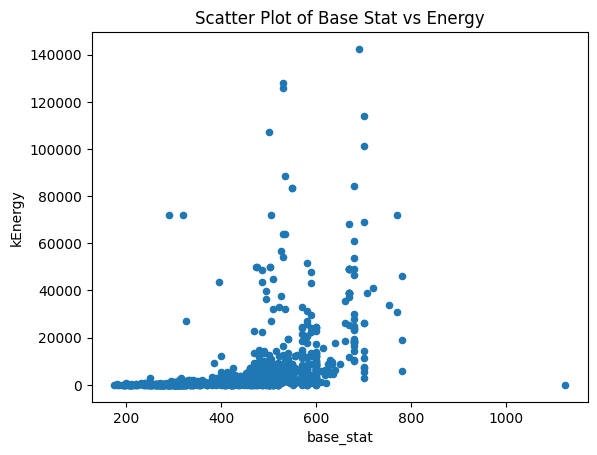

<Figure size 640x480 with 0 Axes>

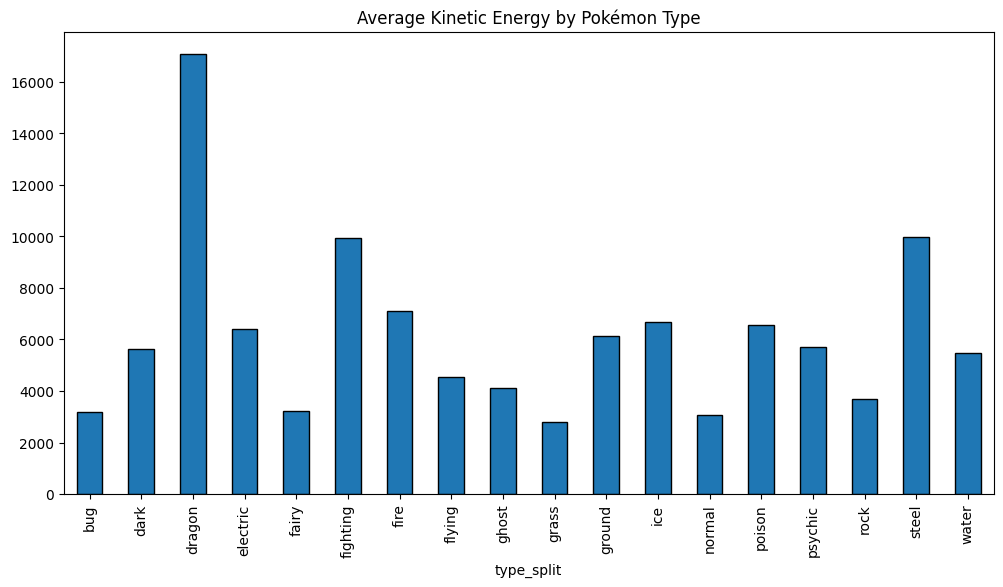

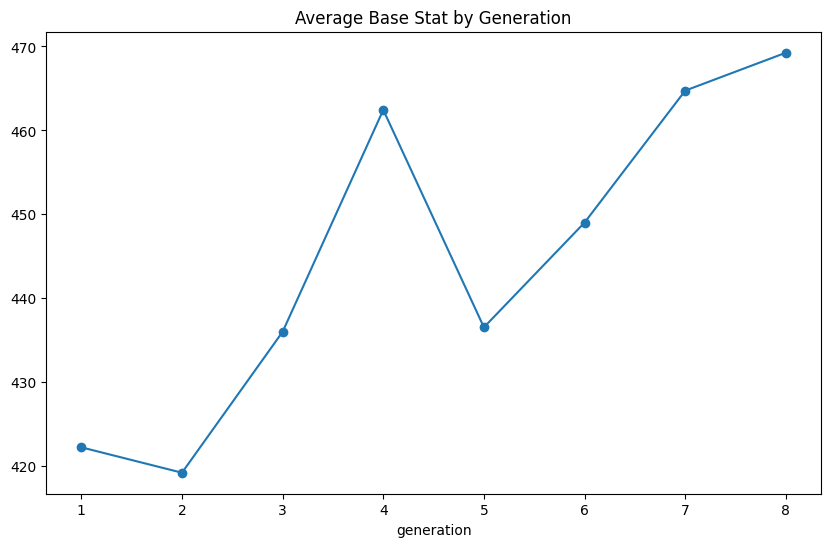

In [144]:
# ATLEAST 3 INTERESTING RESULTS - AND FUNCTION CALLS TO GENERATE THEM

# Load the CSV file
df = pd.read_csv("pokemon.csv")  # Ensure this path points to the correct location of your file

#plot the scatter graph of base stat vs Kenergy
plt.figure()  # Create a new figure
df.plot(kind='scatter', x='base_stat', y='kEnergy')
plt.title("Scatter Plot of Base Stat vs Energy")

#explode the types so we can analyze them individually
df_clean['type_split'] = df_clean['type'].str.split(', ')
df_exploded = df_clean.explode('type_split')

#calculate averages by type
type_kEnergy = df_exploded.groupby('type_split')['kEnergy'].mean()
#convert to DataFrame
type_kEnergy_df = type_kEnergy.reset_index()

#plotting bar chart of Kenergy over types
plt.figure()
type_kEnergy_df.plot(kind='bar', x='type_split', y='kEnergy', edgecolor='black', figsize=(12, 6), legend=False)
plt.title('Average Kinetic Energy by Pokémon Type')


# Calculate the average base stats for each generation
avg_base_stat_by_gen = df.groupby('generation')['base_stat'].mean()

# Plot a line chart of the average base stat by generation
plt.figure()
avg_base_stat_by_gen.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Average Base Stat by Generation')

3. Reflect on project management (approx 250 words) 
    - Timeliness: Reflect on how consistently you made an effort meet deadlines
    - Organization: Reflect on how managed the code-base as the project size increased

-----------------------------------------------------
EDA project management reflection:

Much like with my chatbot, most of the progress has been made in and after the labs associated with its development. The only difference being the first or so weeks since I was still adding some finishing touches to the chatbot and completing its respective write-up/reflections. To solve this issue I worked up a schedule which allowed me to focus on one project at a time, which was helpful as thanks to this the EDA project grew whilst I started to finish up all chatbot project work, leaving me much more time to focus on this project. Other than scheduling, this time around I had used a lot of my free time researching the kind of data I would want to data-scrape as well, letting me get a very clear idea and plan of what I will potentially be doing, and when.

The code block structure of jupyter notebook was a life saver for this project, as being able to run different parts of the code separately was essential to my debugging and testing due to the amount of data being gathered – meaning the data gathering part was very slow. Organising my code into blocks of related functions allowed me to only have to gather data once before manipulating and testing it without having to worry about gathering it again. This also made my code much easier to read and transverse, which coupled with appropriate comments and variable names makes the code easily maintainable and modular.


-----------------------------------------------------


4. Process reflection (approx 200 words) - Discuss the week by week iterative development of your chatbot.
    - Describe each week of chatbot devleopment.
    - What was the feedback you received? How did you work on the feedback to improve EDA? What new features did you add? 

-----------------------------------------------------

Process reflection:


In the first week I did a lot of research on what kind of data I wanted to scrape, this eventually ended with me using the Pokemon API, where I specifically looked at pokemon weight and saved it into a Json file.

During the second week I gathered and cleaned up a lot more data, mainly by expanding lists and returning their items individually, but also by looping through more of the API to get more detailed data. At this point I also decided to switch from using Json to csv since most inputs are numbers.

In the third week I created my own derived columns using the data I have gathered, calculating the BMI, base-stat, speed in m/s and kinetic energy of pokemon

For the final weeks I got feedback on the data I’ve been gathering and been told it’d be interesting to see graphs relating to type against other sets of data. Other than that, we also discussed seeing how the total stats of pokemon may affect energy, do stronger pokemon have more energy? I was personally also interested in the generation of pokemon as it sounds like an interesting datapoint, so I delve and experimented using mainly these points.


-----------------------------------------------------
